In [8]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from datasetsforecast.losses import mse, mae, rmse
from datasetsforecast.evaluation import accuracy

In [9]:
Y_df = pd.read_csv("test1.csv")
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_train_df = Y_df[Y_df.ds <= "2021-12-24"]
Y_test_df = Y_df[Y_df.ds > "2021-12-28"]
Y_df.head(len(Y_df)) 

,unique_id,ds,y
0,Y1,2020-05-27,0.000000
1,Y1,2020-06-08,-1.800000
2,Y1,2020-06-20,-7.200000
3,Y1,2020-07-02,-8.700000
4,Y1,2020-07-14,-11.000000
...,...,...,...
56,Y1,2022-03-30,-51.000000
57,Y1,2022-04-11,-56.900002
58,Y1,2022-04-23,-58.400002
59,Y1,2022-05-05,-64.199997


In [10]:
Y_train_df.head(len(Y_train_df))

,unique_id,ds,y
0,Y1,2020-05-27,0.000000
1,Y1,2020-06-08,-1.800000
2,Y1,2020-06-20,-7.200000
3,Y1,2020-07-02,-8.700000
4,Y1,2020-07-14,-11.000000
5,Y1,2020-07-26,-11.600000
6,Y1,2020-08-07,-12.400000
7,Y1,2020-08-19,-7.800000
8,Y1,2020-08-31,-18.799999
9,Y1,2020-09-12,-12.600000


In [11]:
Y_test_df.head(len(Y_test_df))

,unique_id,ds,y
49,Y1,2022-01-05,-52.900002
50,Y1,2022-01-17,-56.500000
51,Y1,2022-01-29,-58.400002
52,Y1,2022-02-10,-56.099998
53,Y1,2022-02-22,-57.099998
54,Y1,2022-03-06,-52.599998
55,Y1,2022-03-18,-60.299999
56,Y1,2022-03-30,-51.000000
57,Y1,2022-04-11,-56.900002
58,Y1,2022-04-23,-58.400002


In [12]:
horizon = len(Y_test_df)
models = [
    NBEATS(input_size=2 * horizon, h=horizon, max_steps=500),
    NHITS(input_size=2 * horizon, h=horizon, max_steps=500),
]
# 推断频率并获取结果，推测不出来，为None
freq = pd.infer_freq(Y_df['ds'])

nf = NeuralForecast(models=models, freq="12D") #12天一次
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict().reset_index()
Y_hat_df.head(len(Y_hat_df))

Global seed set to 1
Global seed set to 1


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

,unique_id,ds,NBEATS,NHITS
0,Y1,2022-01-05,-48.659206,-46.799091
1,Y1,2022-01-17,-53.641994,-54.115437
2,Y1,2022-01-29,-52.106819,-50.725044
3,Y1,2022-02-10,-50.979393,-50.038342
4,Y1,2022-02-22,-53.562206,-53.952702
5,Y1,2022-03-06,-55.079178,-54.186424
6,Y1,2022-03-18,-55.239391,-56.681061
7,Y1,2022-03-30,-55.550194,-55.320210
8,Y1,2022-04-11,-58.140575,-56.023357
9,Y1,2022-04-23,-57.483379,-59.323784


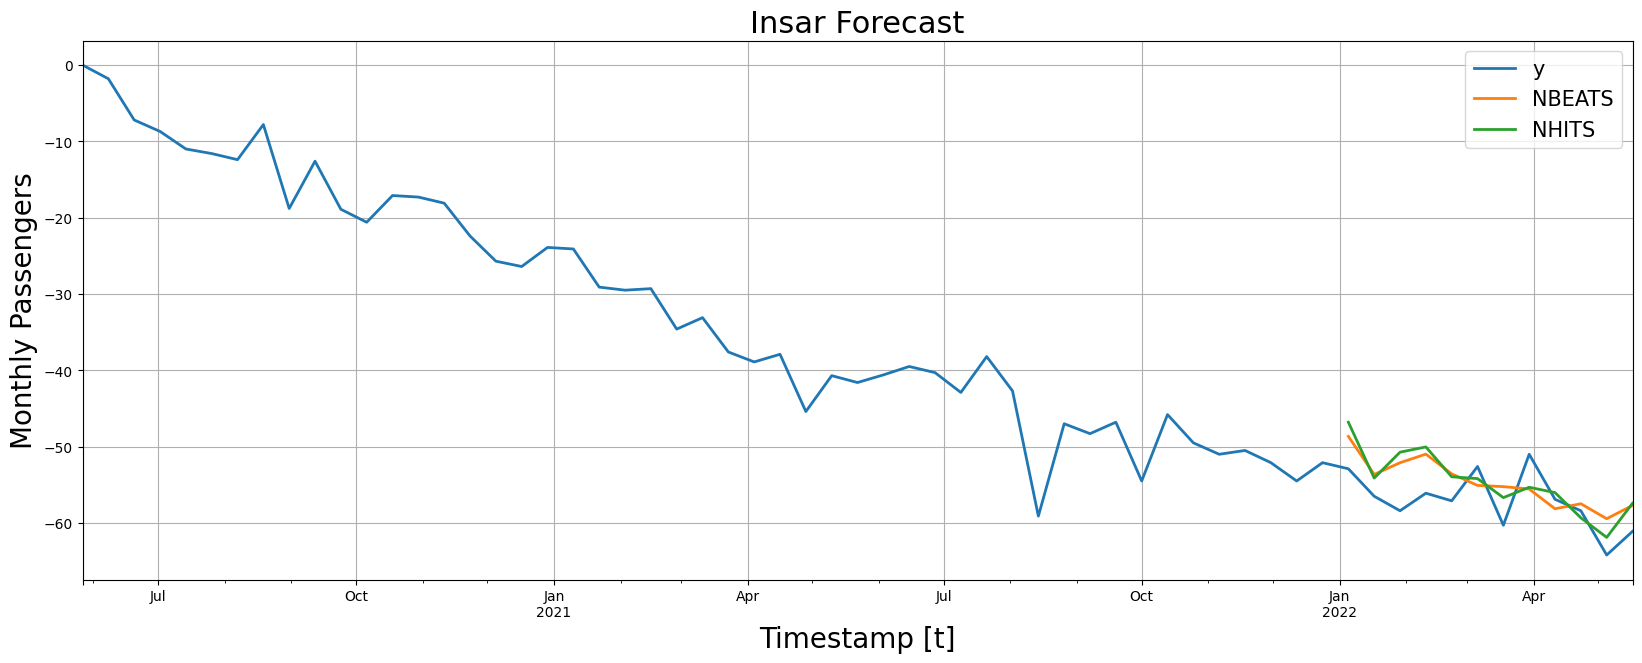

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how="left", on=["unique_id", "ds"])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index("ds")

plot_df[["y", "NBEATS", "NHITS"]].plot(ax=ax, linewidth=2)

ax.set_title("Insar Forecast", fontsize=22)
ax.set_ylabel("Monthly Passengers", fontsize=20)
ax.set_xlabel("Timestamp [t]", fontsize=20)
ax.legend(prop={"size": 15})
ax.grid()

plt.show()